# Algorytmika i matematyka uczenia maszynowego 
## Laboratorium 12 - przekształcenia






### Zadanie 1

1) Utwórz macierz (zbiór punktów) reprezentującą figurę geometryczną, składającą się z minimum 4 punktów, której "punkt centralny" (na oko) znajduje się w punkcie `(0, 0)`.

2) Wyświetl utworzoną figurę na wykresie.

> Podpowiedź: możesz użyć funkcji [`plt.fill`](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.fill.html)

Kolejne zadania wykonuj używając macierz utworzoną w tym zadaniu (chyba, że podano inaczej).


In [1]:
import numpy as np
import matplotlib.pyplot as plt
myArray = np.asarray([[-1,1,1,-1],[-1,-1,1,1]])

myArray

array([[-1,  1,  1, -1],
       [-1, -1,  1,  1]])

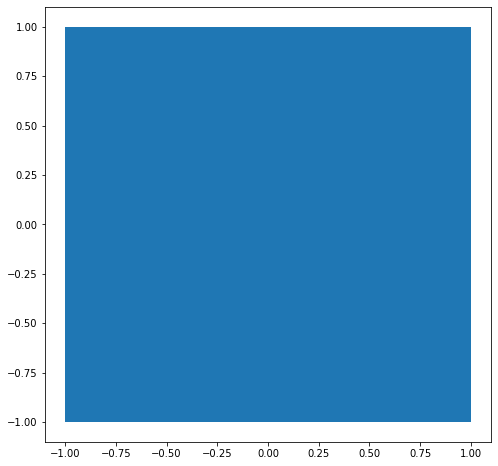

In [2]:
plt.figure(figsize=(8, 8))
plt.fill(myArray[0,:], myArray[1,:])
plt.show()

### Zadanie 2

Aby wykonać przekształcenie należy pomnożyć macierz przekształcaną przez _mecierz przekształcenia_. Poniżej wymienione są przykładowe macierze przekształceń pozwalające wykonać tranformacje:

Obrót o kąt $\theta$:

$$
A_\theta = \begin{pmatrix}
\text{cos}\theta & -\text{sin}\theta\\
\text{sin}\theta & \text{cos}\theta
\end{pmatrix}
$$

Rozciągnięcie wzdłuż osi $0x$:

$$
A_k = \begin{pmatrix}
k & 0\\
0 & 1
\end{pmatrix}
$$

Rozciągnięcie wzdłuż osi $0y$:

$$
A_k = \begin{pmatrix}
1 & 0\\
0 & k
\end{pmatrix}
$$

Rozciągnięcie w proporcji $k_x$ wzdłuż osi $0x$ i w proporcji $k_y$ wzdłuż osi $0y$:

$$
A_k = \begin{pmatrix}
k_x & 0\\
0 & k_y
\end{pmatrix}
$$

Pochylenie względem osi $0y$:

$$
A_k = \begin{pmatrix}
1 & k\\
0 & 1
\end{pmatrix}
$$

Pochylenie względem osi $0x$:

$$
A_k = \begin{pmatrix}
1 & 0\\
k & 1
\end{pmatrix}
$$



**Polecenie**

Utwórz trzy animacje dla obrotu, rozciągnięcia i pochylenia (odpowiednio).


Przykład:

<div style="display: flex; flex-direction: row; flex-wrap: wrap; justify-content: center; width:100%;">
<img src="./Figure_2_rot.gif" height="300" width="300" />
<img src="./Figure_2_strech.gif" height="300" width="300" />
<img src="./Figure_2_shear.gif" height="300" width="300" />
</div>


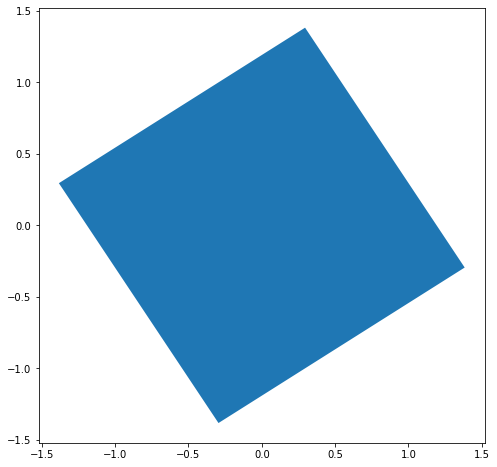

In [9]:
fi = 10 
rotate = np.asarray([[np.cos(fi),-np.sin(fi)],[np.sin(fi),np.cos(fi)]])
rotated = rotate@myArray
plt.figure(figsize=(8, 8))
plt.fill(rotated[0,:], rotated[1,:])
plt.show()

In [ ]:
def animate():
    for i in range(360):
        fi = i
        rotate = np.asarray([[np.cos(fi),-np.sin(fi)],[np.sin(fi),np.cos(fi)]])
        rotated = rotate@myArray
        plt.figure(figsize=(8, 8))
        plt.fill(rotated[0,:], rotated[1,:])
        plt.show()
    

### Zadanie 3 (przekształcenia afiniczne)

Przekształcenia afiniczne pozwalają na wykonywanie operacji _translacji_ i łączenia jej z innymi operacjami przekształcenia. 
Aby wykonać przekształcenie afiniczne należy zmienić reprezentację punktu $(x, y) \in R^2$ na $(x, y, 1) \in R^3$. W ten sposób macierz przekształceń osiąga wymiar 3x3. Macierz pozwalająca wykonanie operacji translacji (przesunięcie o wektor $[k_x, k_y]$) wygląda wtedy następująco:

$$
A_k = \begin{pmatrix}
1 & 0 & k_x \\
0 & 1 & k_y \\
0 & 0 & 1
\end{pmatrix}
$$


Pozostałe operacje analogicznie jak wcześniej, np. operacja obrotu:

$$
A_\theta = \begin{pmatrix}
\text{cos}\theta & -\text{sin}\theta & 0\\
\text{sin}\theta & \text{cos}\theta & 0 \\
0 & 0 & 1
\end{pmatrix}
$$

**Polecenie**

Wykonaj animację, gdzie operacja translacji oraz obrotu są wykonywane za pomocą jednej operacji macierzowej.

> Podpowiedź: należy "połączyć" macierze przekształceń w jedną.


Przykład:

<img src="./Figure_3.gif" height="300" width="300" />

In [3]:
# >> UZUPEŁNIJ <<

### Zadanie 4 (przekształcenia macierzowe w 3D)

1) Utwórz prostą figurę geometryczną złożoną z 8 punktów w przestrzeni 3D (podobnie jak w pierwszym zadaniu).

2) Utwórz animację obrotu figury względem osi $0z$.

> Aby wykonać taki obrót należy użyć poniższej macierzy przekształceń:
$$
A_\theta = \begin{pmatrix}
\text{cos}\theta & -\text{sin}\theta & 0\\
\text{sin}\theta & \text{cos}\theta & 0 \\
0 & 0 & 1
\end{pmatrix}
$$

**Przykład**


<img src="./Figure_4.gif" height="300" width="300" />

In [4]:
# >> UZUPEŁNIJ <<

### Zadanie 5

Połącz punkty (jeżeli nie zrobiłeś wcześniej) figury z poprzedniego zadania.

**Przykład**


<img src="./Figure_5.gif" height="300" width="300" />

In [ ]:
# >> UZUPEŁNIJ <<